# Multivariate Mixture Gaussian Model
## Problem statement:
Create a data set with N = 500 points from two mixed Gaussian distributions (each distribution has five bivariate Gaussian distributions). The elements of the first mixed distribution have a maximum average value of 0 and a minimum average of -5 and a variance of 1. The elements of the second mixed distribution have a maximum mean value of 5, the minimum average is 0 and the variance is 1. Draw decision boundary (Bayes boundary) between N points of the first mixture distribution and N points of the second mixture distribution **without using any machine learning models**.

In [1]:
# import things we might need
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

### Generate samples

* We assume the distribution of mean of the 5 gausian distributions is uniform
* For simplicity, we assume each variable of a bivariate distribution is independent of each other => covariance matrix is diagonal matrix [[1, 0], [0, 1]]
<!-- TEASER_END -->

In [2]:
# parameters for the 2 mixture distributions
N = 500
n_gaussians = 5
means = [np.random.uniform(-5, 0, (n_gaussians, 2)) ,np.random.uniform(0, 5, (n_gaussians, 2))]

cov = np.diag([1, 1])

A mixture gaussian model can be defined as:
$$G(x) = \sum_{i=1}^{M}\alpha_{i} * g_{i}(x); \quad with \sum_{i=1}^{M}\alpha_(i) = 1$$

where $\alpha_{i}$ is the weight of the component distributions $g_{i}$ and M is the number of component distribution in the mixture distribution. In this case we have $M = 5$ and $\alpha_{i} = 1/M =0.2$.

To draw samples from $G$ we can simply draw samples from each $g_{i}$ seperately with the number of samples from each component: $n_{i} = \alpha_{i} * N = 0.2 * 500 = 100$ and combine them into 1 set. Drawing samples from a multivariate gaussian distribution can be done using np.random.multivariate_normal function.


In [3]:
# generate data points here
points = []
for e in range(2):
    mean = means[e]
    p = []
    for i in range(len(mean)):
        x = np.random.multivariate_normal(mean[i], cov, N // n_gaussians )
        p.append(x)
    p = np.concatenate(p)
    points.append(p)

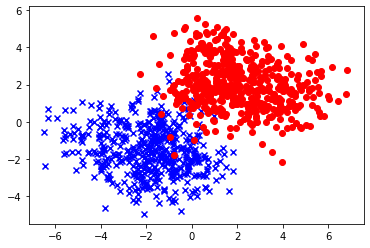

In [4]:
# Let's draw the datapoint first to see some light
for i, p in enumerate(points):
    if i == 1:
        c = 'red'
        marker='o'
    else:
        c = 'blue'
        marker='x'
    x, y = p.T
    plt.scatter(x, y, c=c, marker=marker)

plt.show()

### Calculate the boundary

We have 2 prior distribution:
$\pi_{0} = 0.5, \pi_{1} = 0.5 $ since the number of sample from 2 set are equal

Let $y \in \{0,1\}$ be the output, and $x \in R^{2}$ be the input. Using Bayes' theorem:

$$p(y = 0|x) = \frac{p(x|y=0)\pi_0}{p(x)}\quad and \quad p(y = 1|x) = \frac{p(x|y=1)\pi_1}{p(x)}$$

The decision boundary is the line in &real;<sup>2</sup> where this two conditional probabilities are equal:
$$p(y = 0|x) = p(y = 1|x)$$
or
$$p(x|y=0)\pi_0 = p(x|y=1)\pi_1\qquad(1)$$

Since $\pi_{0} = \pi_{1} = 0.5 $, we can simplify (1) to:
$$p(x|y=0) = p(x|y=1)\qquad(2)$$
Let's solve (2):
$$p(x|y=0)= \sum_{i=0}^{4}\alpha _{1i}e^{-1/2(x - \mu _{1i})^{T}\Sigma^{-1}(x - \mu _{1i})}$$
and
$$p(x|y=1)= \sum_{i=0}^{4}\alpha _{2i}e^{-1/2(x - \mu _{2i})^{T}\Sigma^{-1}(x - \mu _{2i})}$$
where $\alpha_{1i} = \alpha_{2j} = 0.2, \forall i, j$, so (2) can be re-written as:
$$\sum_{i=0}^{4}e^{-1/2(x - \mu _{1i})^{T}\Sigma^{-1}(x - \mu _{1i})}=\sum_{i=0}^{4}e^{-1/2(x - \mu _{2i})^{T}\Sigma^{-1}(x - \mu _{2i})}\qquad(3)$$
It's hard to solve this equation manually but we don't have to, we just need to plot it. Fortunately, we can do so using matplotlib.

First, we need a function to calculate either sides of (3):
$$prob(x) = \sum_{i=0}^{4}e^{-1/2(x - \mu _{i})^{T}\Sigma^{-1}(x - \mu _{i})}$$

In [5]:
# function that calculate the probability of a input belong to each classes
def prob(x1, x2, means, cov):
    X = zip(x1, x2)
    
    total_res = []
    q = np.linalg.inv(cov)
    for x in X:
        res = 0
        for i in range(5):
            _x = x - means[i]
            res += (np.exp(-0.5 * np.dot(np.dot(_x.T, q), _x)))
            res = np.array(res)
        total_res.append(res)
    total_res = np.array(total_res)
    return total_res

The decision boundary or bayes boundary is a line that connects every points that satisfy (3). We can draw this line using contour function provided by matplotlib:

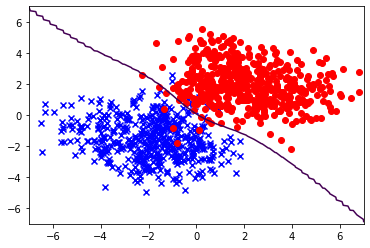

In [6]:
for i, p in enumerate(points):
    if i == 1:
        c = 'red'
        marker='o'
    else:
        c = 'blue'
        marker='x'
    x, y = p.T
    plt.scatter(x, y, c=c, marker=marker)

# draw the boundary
X1, X2 = np.mgrid[-7:7:50j, -7:7:50j]
x1 = X1.ravel()
x2 = X2.ravel()
e = (prob(x1, x2, means[0], cov) - prob(x1, x2, means[1], cov)).reshape(X1.shape)
plt.contour(X1, X2, e, levels=[0])

plt.show()